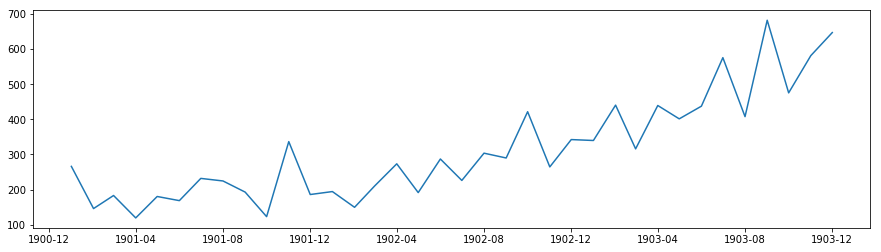

In [1]:
# import and plot the data.  Arbitraily choose yr 1900
from pandas import datetime, read_csv
import matplotlib.pyplot as plt
%matplotlib inline

dateparse = lambda x: datetime.strptime('190'+x, '%Y-%m')
series = read_csv('shampoo-sales.csv', header=None, index_col=0, date_parser=dateparse, squeeze=True)  #squeeze to series
plt.figure(figsize=(15,4))  # must set before plot
plt.plot(series)
plt.show();

# arima parameters 
are (p,d,q)
* p: # of time lags
* d: degree of differencing, always 1 so far
* q: order of moving average

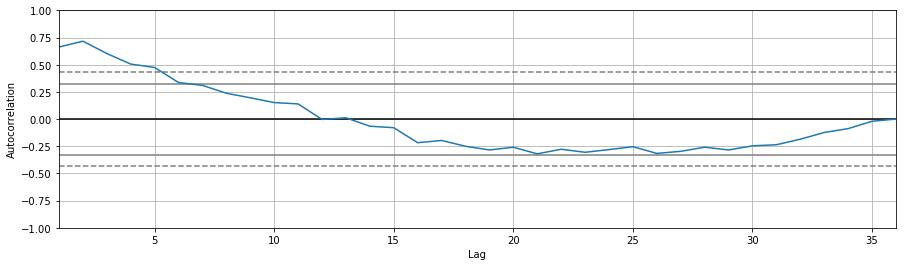

In [2]:
# print autocorrelation for figure out p

# auto in correlation means self
# lag of 0, by definition, is perfectly correlated (@ 1) to its own values

# look for max lag value > 0 that statistically significant (above dotted threshold) 
# that will give us parameter p.  in this case lag of 5

from pandas.plotting import autocorrelation_plot
plt.figure(figsize=(15,4))
autocorrelation_plot(series);

##  Run Arima

In [3]:
# take a third of our data for testing
size = int(len(series.values) * 0.66)  
test = series.values[size:]  
train = series.values[0:size]

history = [x for x in train]   # store running values for moving avg based prediction

print("train, test, history records = {}, {}, {}".format(train.size,test.size,len(history)))

train, test, history records = 23, 13, 23


C:\Users\Nathan\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


predicted=349, expected=342
predicted=307, expected=340
predicted=387, expected=440
predicted=348, expected=316
predicted=386, expected=439
predicted=356, expected=401
predicted=446, expected=437
predicted=395, expected=576
predicted=435, expected=408
predicted=508, expected=682
predicted=435, expected=475
predicted=653, expected=581
predicted=546, expected=647


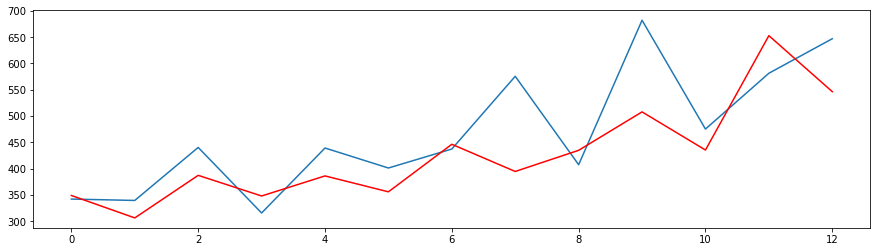

In [4]:
from statsmodels.tsa.arima_model import ARIMA

predictions = list()
for t in range(len(test)):
    model = ARIMA(history, order=(5,1,0))   # lag of 5, 1 degree of difference
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)   
    obs = test[t]
    history.append(obs)   # for arima to compute MOVING average
    print('predicted=%.0f, expected=%.0f' % (yhat, obs))
#     print("train, test, history records = {}, {}, {}".format(train.size,test.size,len(history)))

plt.figure(figsize=(15,4))  # must set before plot
plt.plot(test)
plt.plot(predictions, color='red')
plt.show();

## Model eval

In [5]:
from sklearn.metrics import mean_squared_error
from math import sqrt
import math
import numpy as np

error = mean_squared_error(test, predictions)
rmse = sqrt(error)
print("Amt we're typically off:")
print('   Std error %.3f' % rmse)
if not math.isnan(rmse):
    print('   {:.2f}%'.format(rmse / np.mean(test) * 100))

Amt we're typically off:
   Std error 83.417
   17.82%


In [6]:
print(test)
print(predictions)

[ 342.3  339.7  440.4  315.9  439.3  401.3  437.4  575.5  407.6  682.
  475.3  581.3  646.9]
[array([ 349.11774082]), array([ 306.51293229]), array([ 387.37638462]), array([ 348.15418287]), array([ 386.30879974]), array([ 356.08205997]), array([ 446.37947189]), array([ 394.73728256]), array([ 434.91556973]), array([ 507.92335101]), array([ 435.48309405]), array([ 652.74376537]), array([ 546.34346587])]


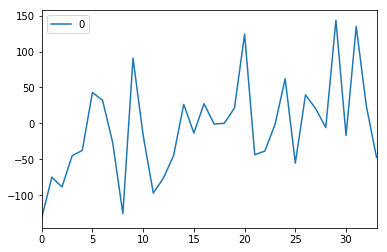

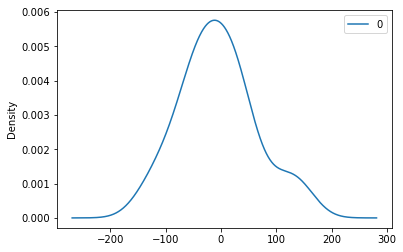

                0
count   34.000000
mean    -5.699470
std     67.335341
min   -131.330324
25%    -44.826464
50%     -9.493551
75%     27.194143
max    143.476058


In [7]:
import pandas as pd
# plot residual errors
# indicates there's some gaussian (normal distribution) on residuals that could be further corrected
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
plt.show()
residuals.plot(kind='kde')
plt.show()
print(residuals.describe())